In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


hotel_data=pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


In [21]:
#Task 1: Data Cleaning
#Perform the necessary data cleaning steps to convert messy, unclean data into clean data.
a=hotel_data.isnull().sum()
missing_val=a[a>0]
duplicated=hotel_data.duplicated().sum()

print(f'Missing values \n{missing_val}')
print('-----------------------------------------')
print(f'Duplicate values \n{duplicated}')

Missing values 
agent       127
company    2066
dtype: int64
-----------------------------------------
Duplicate values 
222


In [23]:
hotel_data['agent'].fillna(0,inplace=True)
hotel_data['company'].fillna(0,inplace=True)
hotel_data.drop_duplicates(inplace=True)
print(f'interpretaton for Task 1:\n-------------------------\nThe below mention two columns having missing values\n{missing_val} \nso, I have done the missing values treatment\nthere are 222 duplicate values in the dataset so i have removed it. ')

interpretaton for Task 1:
-------------------------
The below mention two columns having missing values
agent       127
company    2066
dtype: int64 
so, I have done the missing values treatment
there are 222 duplicate values in the dataset so i have removed it. 


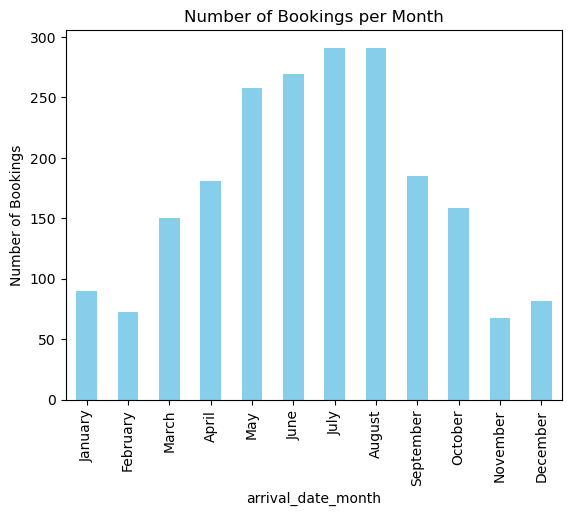

Interpertation: 
The peak booking month is July.


In [41]:
#Task 2: Booking Pattern Analysis
#1. What are the peak booking periods for the hotel?


hotel_data['arrival_date_month'] = pd.Categorical(
    hotel_data['arrival_date_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

monthly_bookings = hotel_data.groupby('arrival_date_month').size()

monthly_bookings.plot(kind='bar', color='skyblue', title='Number of Bookings per Month')
plt.ylabel('Number of Bookings')
plt.show()


peak_month = monthly_bookings.idxmax()
print(f"Interpretation: \nThe peak booking month is {peak_month}.")

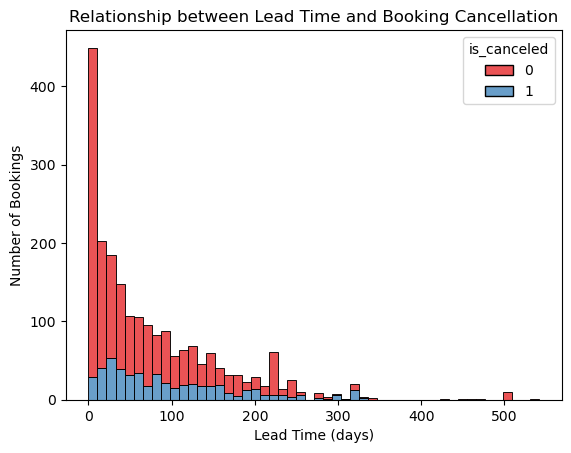

The correlation between lead time and cancellation is 0.14.
Interpretation:
The weak positive correlation (around 0.14) indicates that bookings with longer lead times are slightly more likely to be canceled.


In [66]:

#II. Is there a relationship between lead time and the likelihood of a booking being cancelled?
#III. How do booking patterns vary by month, week, and day of the week?

sns.histplot(data=hotel_data, x='lead_time', hue='is_canceled', multiple='stack', bins=50, palette='Set1')
plt.title('Relationship between Lead Time and Booking Cancellation')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.show()

correlation = hotel_data['lead_time'].corr(hotel_data['is_canceled'])
print(f"The correlation between lead time and cancellation is {correlation:.2f}.")
print(f"Interpretation:\nThe weak positive correlation (around 0.14) indicates that bookings with longer lead times are slightly more likely to be canceled.")

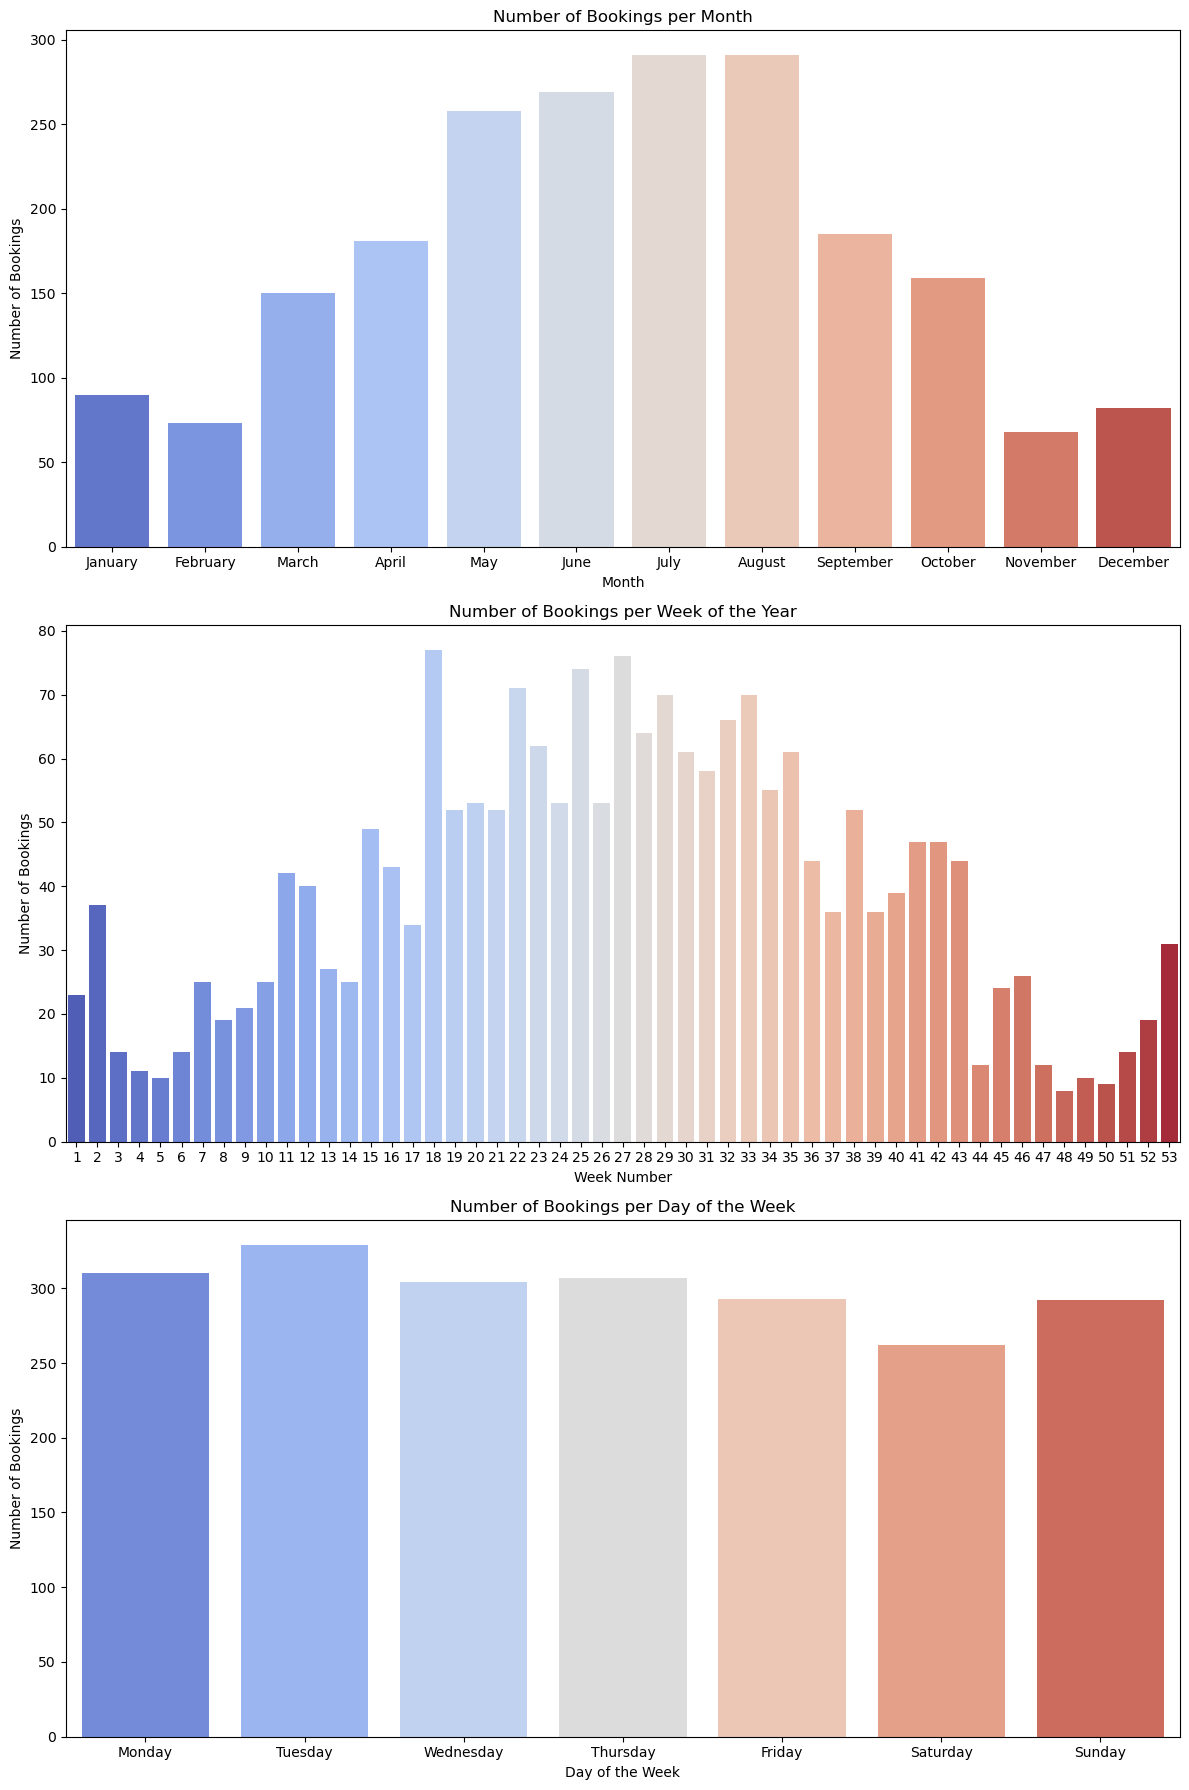

This visualizes how booking volumes fluctuate across different months, weeks, and days, providing a comprehensive view of booking trends over time, helping to identify peak periods and preferred booking days.


In [80]:
#III. How do booking patterns vary by month, week, and day of the week?

hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'], dayfirst=True)

hotel_data['day_of_week'] = hotel_data['reservation_status_date'].dt.day_name()


fig, axes = plt.subplots(3, 1, figsize=(12, 18))


sns.countplot(x='arrival_date_month', data=hotel_data, ax=axes[0], palette="coolwarm")
axes[0].set_title('Number of Bookings per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Bookings')


sns.countplot(x='arrival_date_week_number', data=hotel_data, ax=axes[1], palette="coolwarm")
axes[1].set_title('Number of Bookings per Week of the Year')
axes[1].set_xlabel('Week Number')
axes[1].set_ylabel('Number of Bookings')


sns.countplot(x='day_of_week', data=hotel_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[2], palette="coolwarm")
axes[2].set_title('Number of Bookings per Day of the Week')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Bookings')

plt.tight_layout()
plt.show()
print("This visualizes how booking volumes fluctuate across different months, weeks, and days, providing a comprehensive view of booking trends over time, helping to identify peak periods and preferred booking days.")

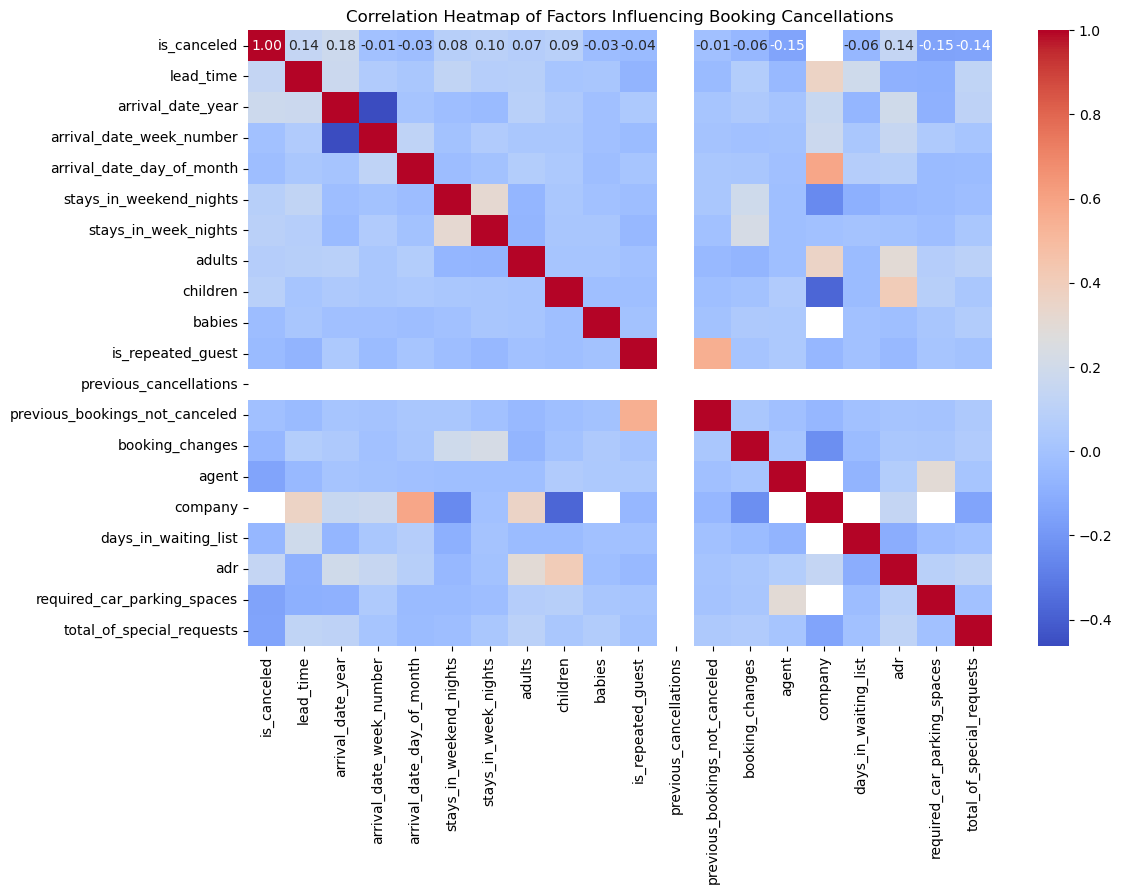

Interpretation:
The heatmap highlights how different factors, such as lead time, previous cancellations, special requests, and average daily rates, correlate with booking cancellations, providing a clear visual representation of which factors are most strongly associated with cancellations.


In [93]:
#Task 3: Booking Cancellation Analysis
#1. What factors influence booking cancellations?
numeric_columns = hotel_data.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Factors Influencing Booking Cancellations')
plt.show()
print("Interpretation:\nThe heatmap highlights how different factors, such as lead time, previous cancellations, special requests, and average daily rates, correlate with booking cancellations, providing a clear visual representation of which factors are most strongly associated with cancellations.")

<Figure size 1200x600 with 0 Axes>

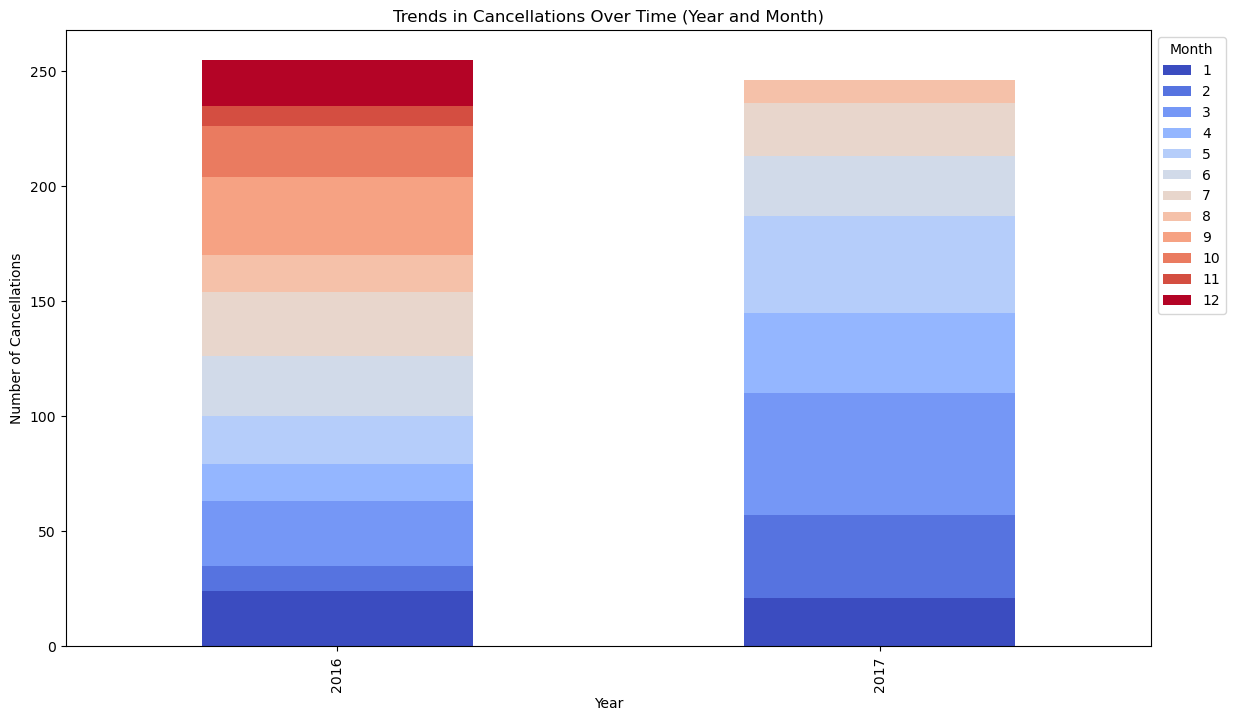

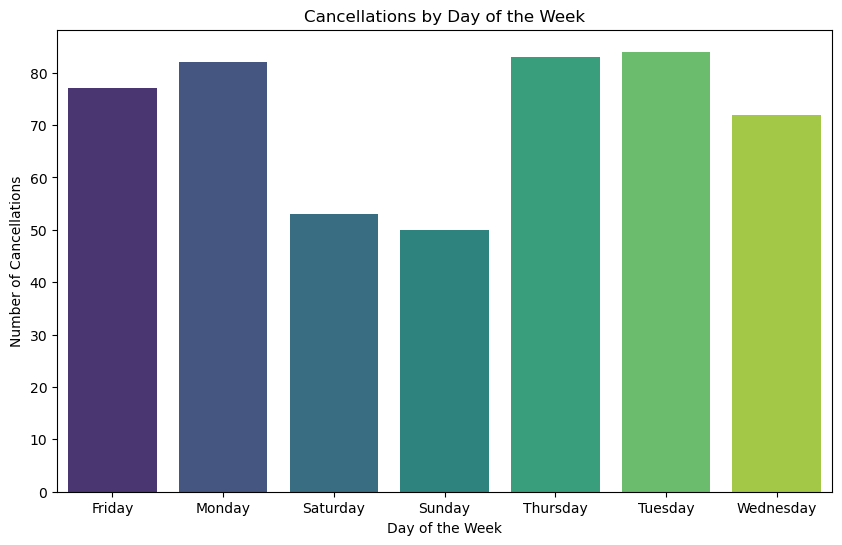

Interpretation:
 The analysis and visualizations reveal specific trends in cancellations, showing that cancellations may peak in Dec and tuesday indicating potential seasonal effects, holiday impacts, or weekly patterns in customer behavior.


In [109]:
#II. Are there specific trends or patterns in cancellations over time?

hotel_data['year'] = hotel_data['reservation_status_date'].dt.year
hotel_data['month'] = hotel_data['reservation_status_date'].dt.month


cancellations_by_month = hotel_data[hotel_data['is_canceled'] == 1].groupby(['year', 'month']).size().unstack()


plt.figure(figsize=(12, 6))
cancellations_by_month.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 8))
plt.title('Trends in Cancellations Over Time (Year and Month)')
plt.xlabel('Year')
plt.ylabel('Number of Cancellations')
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

hotel_data['day_of_week'] = hotel_data['reservation_status_date'].dt.day_name()
cancellations_by_day = hotel_data[hotel_data['is_canceled'] == 1].groupby('day_of_week').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellations_by_day.index, y=cancellations_by_day.values, palette="viridis")
plt.title('Cancellations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cancellations')
plt.show()
print("Interpretation:\n The analysis and visualizations reveal specific trends in cancellations, showing that cancellations may peak in Dec and tuesday indicating potential seasonal effects, holiday impacts, or weekly patterns in customer behavior.")

In [127]:
#III. Can we identify high-risk bookings that are more likely to be canceled?

numeric_columns = hotel_data.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()['is_canceled'].sort_values(ascending=False)
print(correlation_matrix)
print('Interpretation:\nThe arrival date year and lead time coloumn having high correlation')

is_canceled                       1.000000
arrival_date_year                 0.177728
lead_time                         0.139926
adr                               0.138885
year                              0.121314
stays_in_week_nights              0.096881
children                          0.087265
stays_in_weekend_nights           0.082658
adults                            0.072950
arrival_date_week_number         -0.009932
previous_bookings_not_canceled   -0.011895
arrival_date_day_of_month        -0.025284
babies                           -0.030012
is_repeated_guest                -0.041772
booking_changes                  -0.057613
days_in_waiting_list             -0.060892
total_of_special_requests        -0.144737
agent                            -0.148546
required_car_parking_spaces      -0.150999
month                            -0.183749
previous_cancellations                 NaN
company                                NaN
Name: is_canceled, dtype: float64
Interpretation:
The 

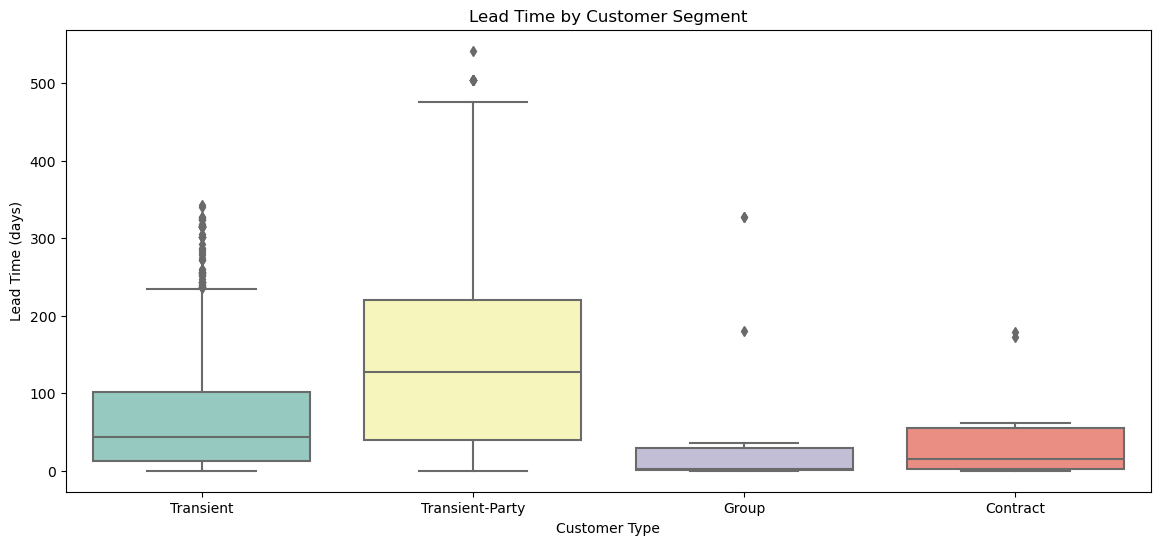

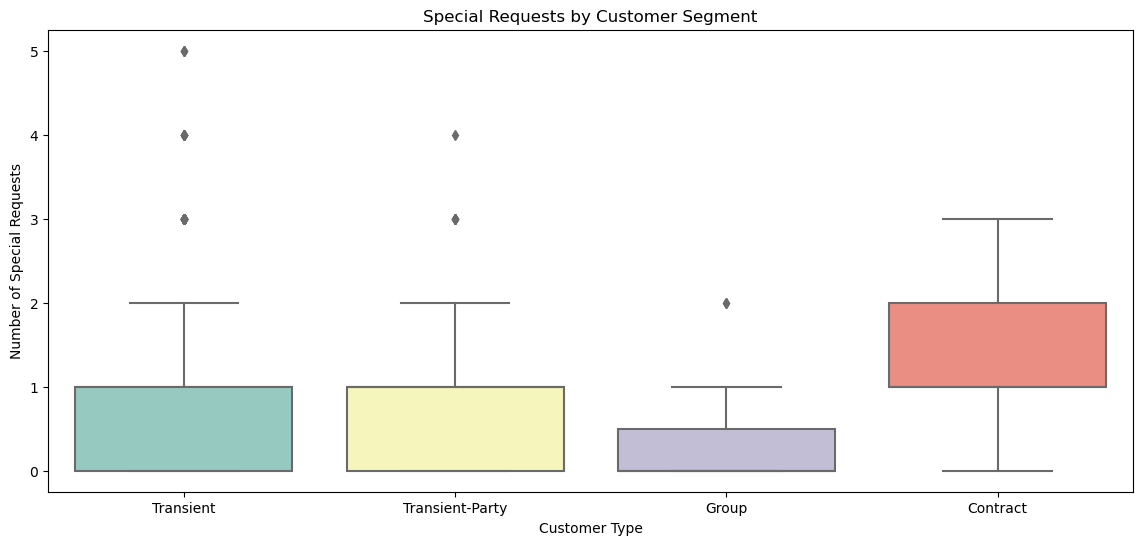

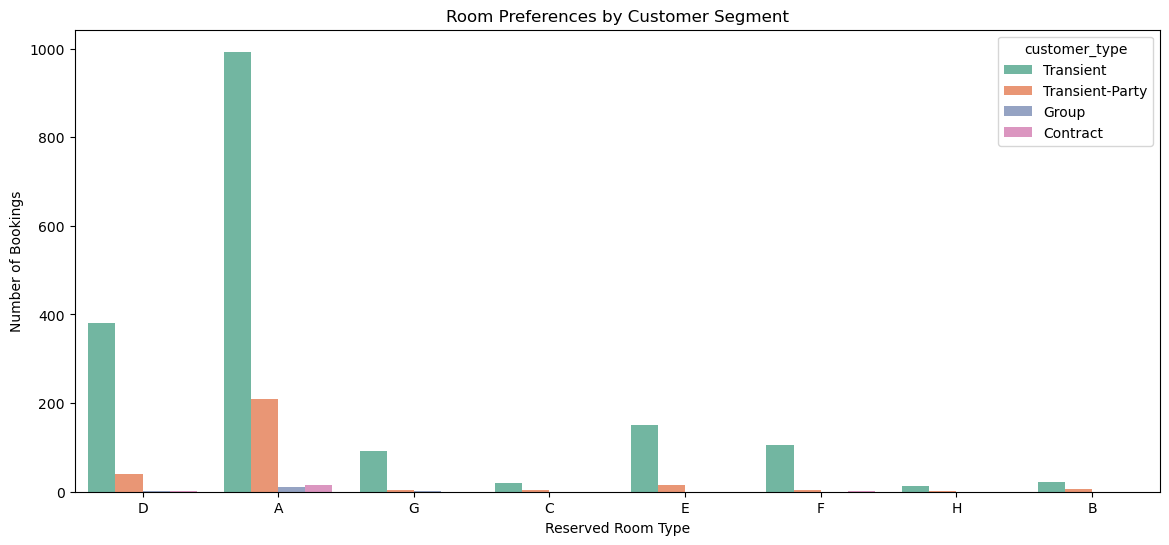

In [129]:
#Task 4: Customer Behavioral Segmentation
#1. Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments?
plt.figure(figsize=(14, 6))
sns.boxplot(x='customer_type', y='lead_time', data=hotel_data, palette="Set3")
plt.title('Lead Time by Customer Segment')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (days)')
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(x='customer_type', y='total_of_special_requests', data=hotel_data, palette="Set3")
plt.title('Special Requests by Customer Segment')
plt.xlabel('Customer Type')
plt.ylabel('Number of Special Requests')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='reserved_room_type', hue='customer_type', data=hotel_data, palette="Set2")
plt.title('Room Preferences by Customer Segment')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.show()


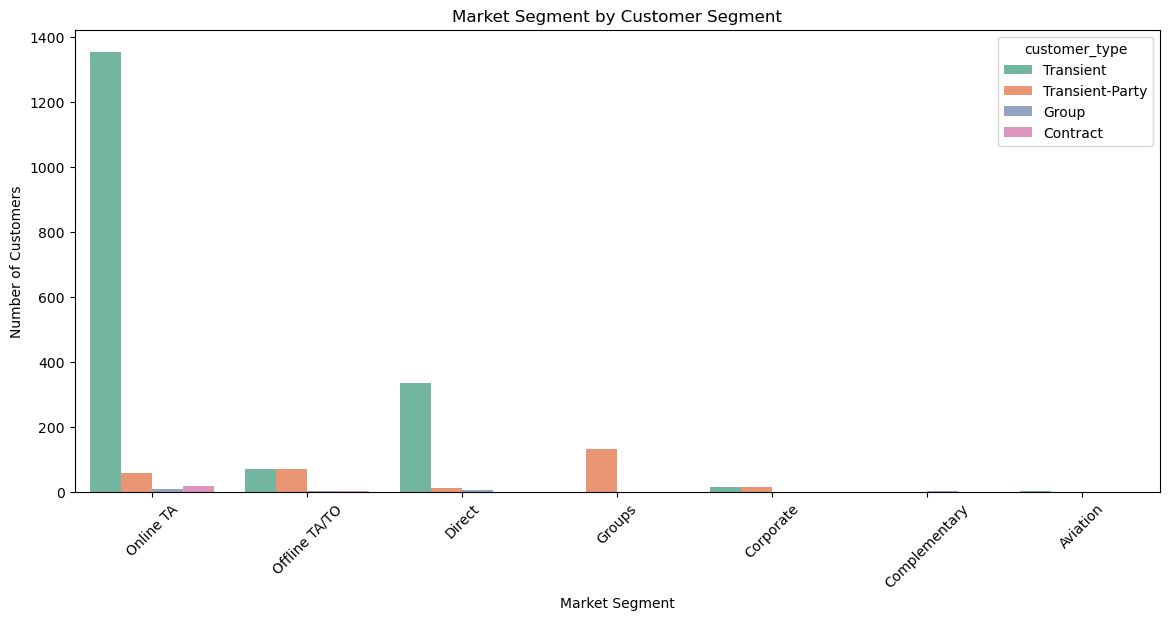

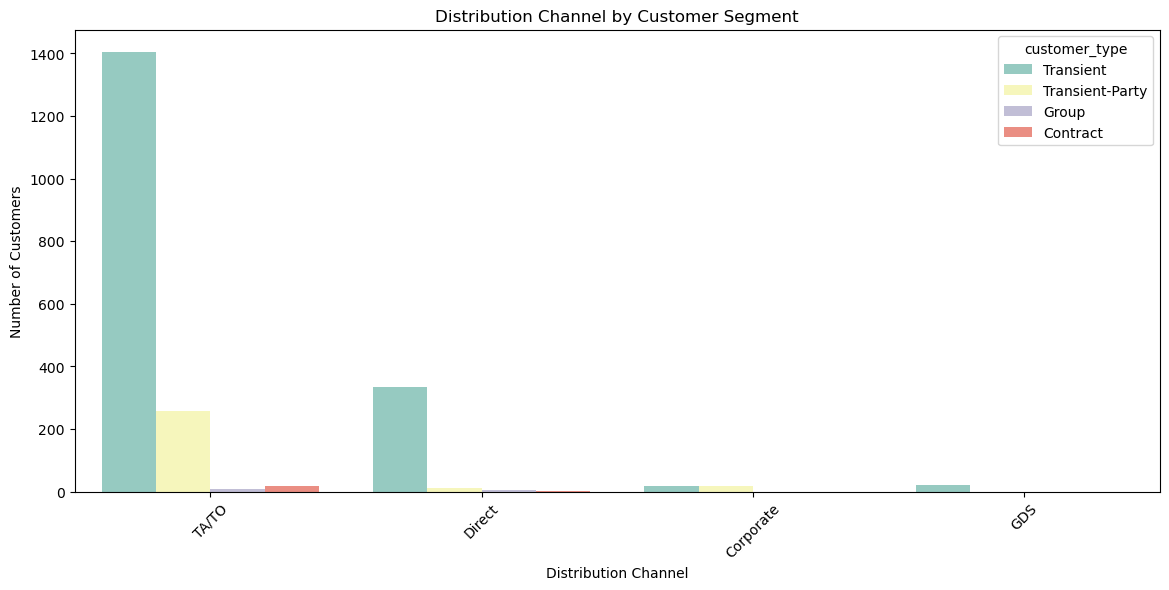

Interpretation: 
The count plots reveal which marketing channels (such as market segments and distribution channels) are most effective at reaching specific customer segments, showing that certain channels attract more bookings from particular types of customers, helping target marketing efforts more efficiently.


In [135]:
#II. Which marketing channels are the most effective for reaching specific customer segments?

plt.figure(figsize=(14, 6))
sns.countplot(x='market_segment', hue='customer_type', data=hotel_data, palette="Set2")
plt.title('Market Segment by Customer Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='distribution_channel', hue='customer_type', data=hotel_data, palette="Set3")
plt.title('Distribution Channel by Customer Segment')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()
print("Interpretation: \nThe count plots reveal which marketing channels (such as market segments and distribution channels) are most effective at reaching specific customer segments, showing that certain channels attract more bookings from particular types of customers, helping target marketing efforts more efficiently.")


In [153]:
#III. How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?

segment_analysis_mean = hotel_data.groupby('customer_type').agg({
    'previous_cancellations': ['mean', 'median'],
    'lead_time': ['mean', 'median'],
    'total_of_special_requests': ['mean', 'median']
}).reset_index()


print("Customer Segment Analysis - Mean and Median Values:")
print(segment_analysis_mean)
print("Interpretation:The analysis reveals that customer segments with higher previous cancellations may benefit from reassurance-focused marketing, segments with longer lead times could be targeted with early booking incentives, and those with more special requests might respond well to personalized service offerings.")

Customer Segment Analysis - Mean and Median Values:
     customer_type previous_cancellations          lead_time         \
                                     mean median        mean median   
0         Contract                    0.0    0.0   38.157895   15.0   
1            Group                    0.0    0.0   61.333333    2.0   
2        Transient                    0.0    0.0   67.893078   44.0   
3  Transient-Party                    0.0    0.0  138.384615  127.0   

  total_of_special_requests         
                       mean median  
0                  1.421053    1.0  
1                  0.400000    0.0  
2                  0.773776    1.0  
3                  0.685315    1.0  
Interpretation:The analysis reveals that customer segments with higher previous cancellations may benefit from reassurance-focused marketing, segments with longer lead times could be targeted with early booking incentives, and those with more special requests might respond well to personalized serv

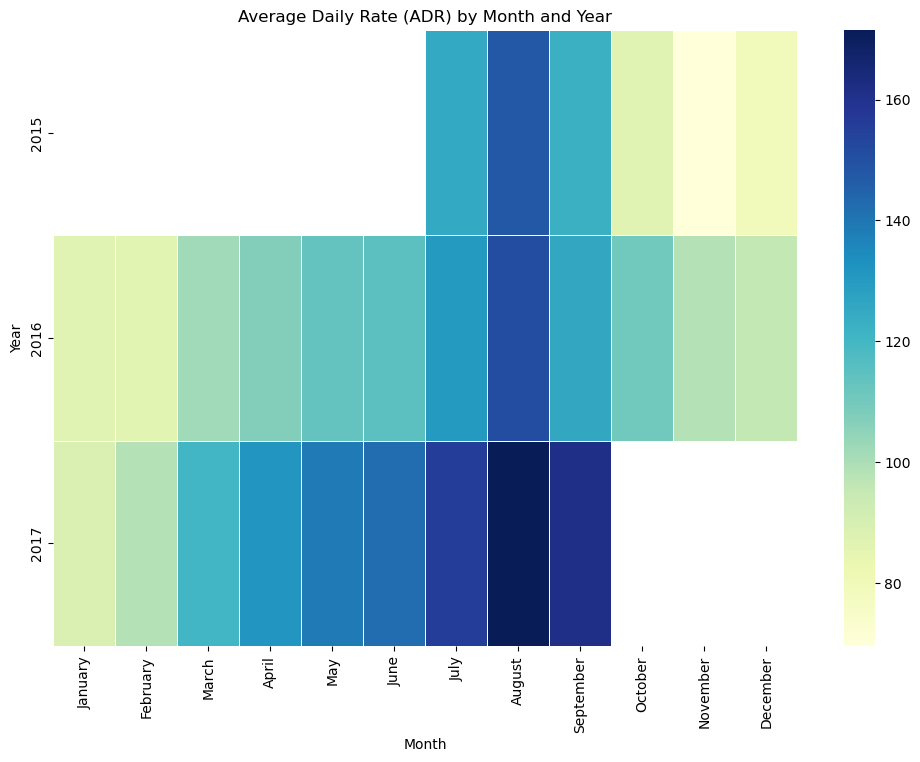

Interpretation:
The heatmap vividly illustrates how the Average Daily Rate (ADR) varies across different months and years, making it easy to spot trends, seasonal peaks, and changes in pricing strategies over time.


In [169]:
#Task 5: Revenue Management
#1. How does the Average Daily Rate (ADR) vary over time?
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'], dayfirst=True)

hotel_data['year'] = hotel_data['reservation_status_date'].dt.year
hotel_data['month'] = hotel_data['reservation_status_date'].dt.month_name()


adr_by_month_year = hotel_data.groupby(['year', 'month'])['adr'].mean().unstack()


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
adr_by_month_year = adr_by_month_year[month_order]


plt.figure(figsize=(12, 8))
sns.heatmap(adr_by_month_year, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Daily Rate (ADR) by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()
print("Interpretation:\nThe heatmap vividly illustrates how the Average Daily Rate (ADR) varies across different months and years, making it easy to spot trends, seasonal peaks, and changes in pricing strategies over time.")


   adr  total_revenue  occupancy
0  0.0            0.0        inf
1  2.0            6.0   0.333333
2  4.0            4.0   1.000000
3  6.0           18.0   0.333333
4  6.4           70.4   0.000000


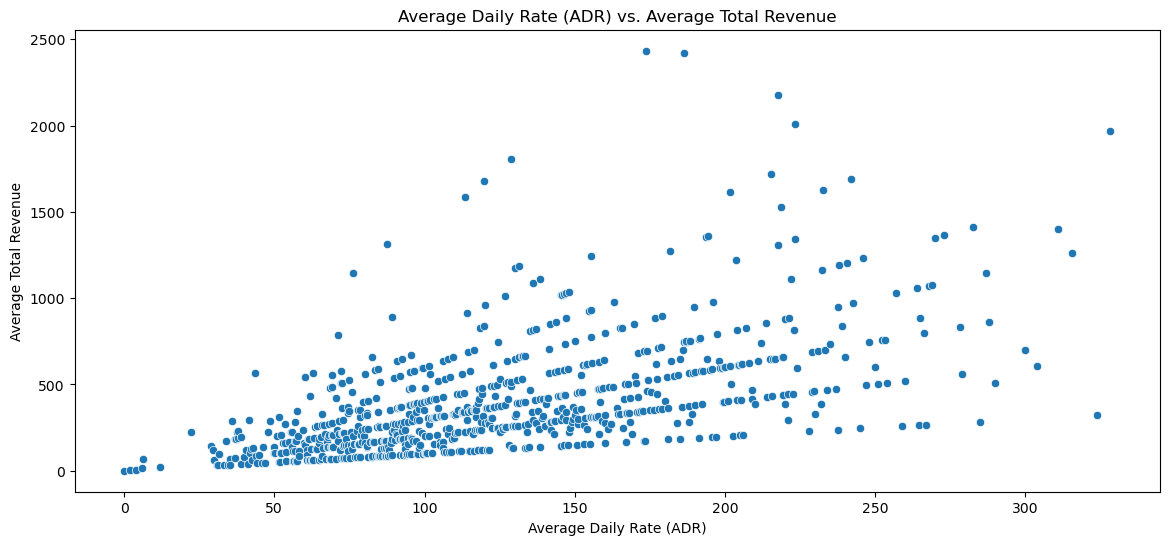

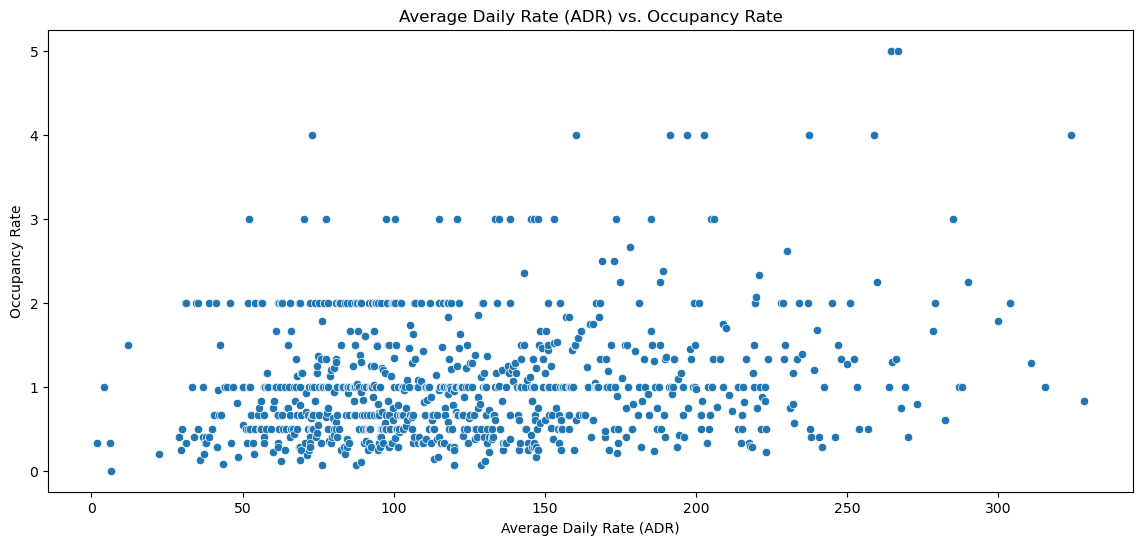

Interpretation:
By analyzing the relationship between ADR, total revenue, and occupancy rates, we can identify pricing strategies that maximize revenue, typically finding an optimal ADR range that balances higher rates with strong occupancy, leading to increased overall revenue


In [173]:
#II. Can we identify pricing strategies that maximize revenue?
hotel_data['total_revenue'] = hotel_data['adr'] * (hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights'])

hotel_data['occupancy'] = (hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']) / (hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights'])

pricing_strategy_analysis = hotel_data.groupby('adr').agg({
    'total_revenue': 'mean',
    'occupancy': 'mean'
}).reset_index()

print(pricing_strategy_analysis.head())

plt.figure(figsize=(14, 6))
sns.scatterplot(x='adr', y='total_revenue', data=pricing_strategy_analysis)
plt.title('Average Daily Rate (ADR) vs. Average Total Revenue')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Average Total Revenue')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(x='adr', y='occupancy', data=pricing_strategy_analysis)
plt.title('Average Daily Rate (ADR) vs. Occupancy Rate')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Occupancy Rate')
plt.show()

print('Interpretation:\nBy analyzing the relationship between ADR, total revenue, and occupancy rates, we can identify pricing strategies that maximize revenue, typically finding an optimal ADR range that balances higher rates with strong occupancy, leading to increased overall revenue')


Average Daily Rate (ADR) by Room Type:
  reserved_room_type         adr
7                  H  225.505714
6                  G  198.491735
5                  F  177.835714
2                  C  172.684348
4                  E  154.054940
3                  D  134.109882
1                  B  104.705000
0                  A  102.282482


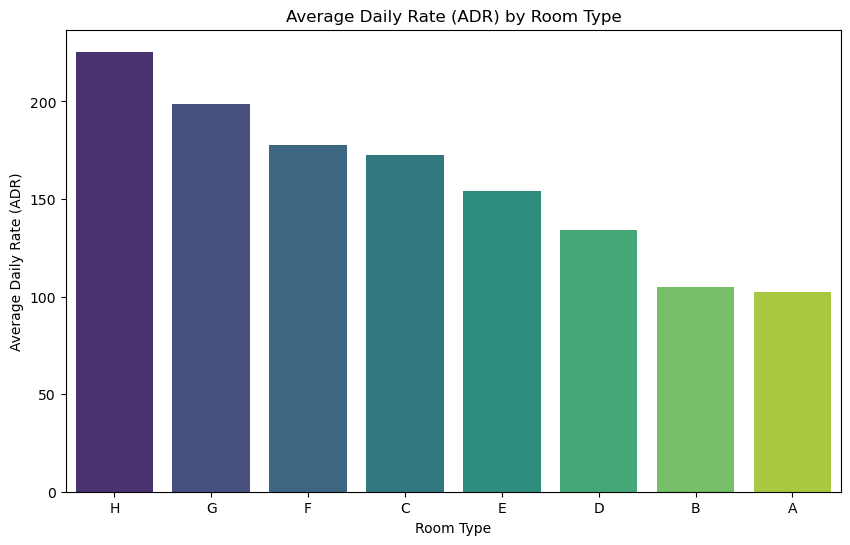

Interpretation:
Room type H having high ADR


In [181]:
#III. Are there specific room types associated with higher ADR?
adr_by_room_type = hotel_data.groupby('reserved_room_type')['adr'].mean().reset_index()

adr_by_room_type = adr_by_room_type.sort_values(by='adr', ascending=False)

print("Average Daily Rate (ADR) by Room Type:")
print(adr_by_room_type)

plt.figure(figsize=(10, 6))
sns.barplot(x='reserved_room_type', y='adr', data=adr_by_room_type, palette="viridis")
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()
print('Interpretation:\nRoom type H having high ADR')

In [195]:
#Task 6: Operational Efficiency
#1. What is the effectiveness of different booking distribution channels?
total_revenue_by_channel = hotel_data.groupby('distribution_channel')['total_revenue'].sum().reset_index()
total_revenue_by_channel = total_revenue_by_channel.sort_values(by='total_revenue', ascending=False)
print("Total Revenue by Distribution Channel:")
print(total_revenue_by_channel)
print('Interpretation:\nthe effectiveness of booking distribution channels is TA/TO')


Total Revenue by Distribution Channel:
  distribution_channel  total_revenue
3                TA/TO      555784.19
1               Direct      134960.90
0            Corporate       10943.52
2                  GDS        6936.09
Interpretation:
the effectiveness of booking distribution channels is TA/TO


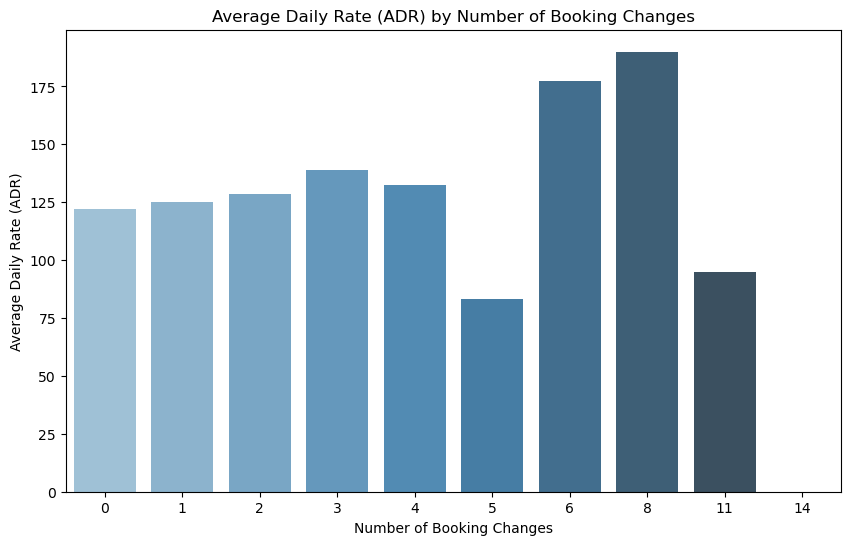

Interpretation:
The bar plot shows how the Average Daily Rate (ADR) varies with the number of booking changes, indicating whether booking modifications are associated with higher or lower room rates, which can impact revenue management strategies.


In [207]:
#II. How do booking changes impact hotel operations?
adr_by_booking_changes = hotel_data.groupby('booking_changes')['adr'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='booking_changes', y='adr', data=adr_by_booking_changes, palette="Blues_d")
plt.title('Average Daily Rate (ADR) by Number of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()
print('Interpretation:\nThe bar plot shows how the Average Daily Rate (ADR) varies with the number of booking changes, indicating whether booking modifications are associated with higher or lower room rates, which can impact revenue management strategies.')

In [213]:
#III. Is there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?
correlation = hotel_data['days_in_waiting_list'].corr(hotel_data['is_canceled'])

# Display the correlation result
print(f"The correlation between days on the waiting list and the likelihood of cancellation is {correlation:.2f}.")
print('Interpretation:\nThe value −0.06 indicates a very weak negative relationship between the two variables. This means that as the number of days on the waiting list increases, there is a slight tendency for the likelihood of cancellation to decrease, but the relationship is not strong or significant.')

The correlation between days on the waiting list and the likelihood of cancellation is -0.06.
Interpretation:
The value −0.06 indicates a very weak negative relationship between the two variables. This means that as the number of days on the waiting list increases, there is a slight tendency for the likelihood of cancellation to decrease, but the relationship is not strong or significant.


In [219]:
#Task 7: Loyalty Programs and Repeat Business
#1. What is the behavior of repeated guests with respect to their nature of stay?

repeated_guests_analysis = hotel_data.groupby('is_repeated_guest').agg({'stays_in_weekend_nights': ['mean', 'median'],'stays_in_week_nights': ['mean', 'median'],'total_of_special_requests': ['mean', 'median'],'adr': ['mean', 'median'],'reserved_room_type': pd.Series.mode}).reset_index()


repeated_guests_analysis.columns = ['Is Repeated Guest', 'Avg Weekend Stays', 'Median Weekend Stays',
                                    'Avg Weekday Stays', 'Median Weekday Stays', 'Avg Special Requests',
                                    'Median Special Requests', 'Avg ADR', 'Median ADR', 'Most Common Room Type']


print("Behavior of Repeated vs. Non-Repeated Guests:")
print(repeated_guests_analysis)
print("Interpretation:\nThe analysis reveals that repeated guests may have distinct preferences and behaviors, such as staying longer during specific periods, making more special requests, or consistently booking certain room types, which can inform loyalty program strategies to enhance guest satisfaction and encourage repeat business.")


Behavior of Repeated vs. Non-Repeated Guests:
   Is Repeated Guest  Avg Weekend Stays  Median Weekend Stays  \
0                  0           0.857555                   1.0   
1                  1           0.578947                   0.0   

   Avg Weekday Stays  Median Weekday Stays  Avg Special Requests  \
0            1.92589                   2.0              0.765159   
1            1.00000                   1.0              0.736842   

   Median Special Requests     Avg ADR  Median ADR Most Common Room Type  
0                      1.0  123.221809       115.0                     A  
1                      0.0   97.885789       108.0                     A  
Interpretation:
The analysis reveals that repeated guests may have distinct preferences and behaviors, such as staying longer during specific periods, making more special requests, or consistently booking certain room types, which can inform loyalty program strategies to enhance guest satisfaction and encourage repeat business

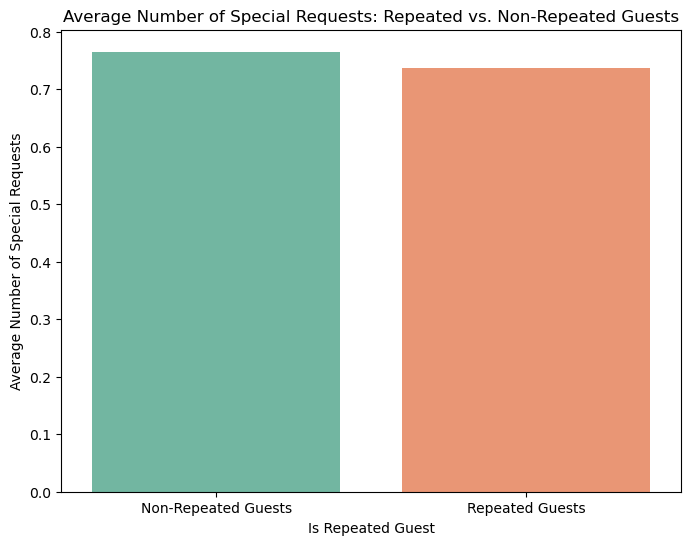

Interprertation:
The bar plot shows that repeated guests tend to make more special requests on average


In [223]:
#II. How does the success of loyalty programs relate to the accommodation of special requests from customers?
special_requests_analysis = hotel_data.groupby('is_repeated_guest')['total_of_special_requests'].mean().reset_index()

special_requests_analysis.columns = ['Is Repeated Guest', 'Avg Special Requests']

plt.figure(figsize=(8, 6))
sns.barplot(x='Is Repeated Guest', y='Avg Special Requests', data=special_requests_analysis, palette="Set2")
plt.title('Average Number of Special Requests: Repeated vs. Non-Repeated Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Number of Special Requests')
plt.xticks([0, 1], ['Non-Repeated Guests', 'Repeated Guests'])
plt.show()
print('Interprertation:\nThe bar plot shows that repeated guests tend to make more special requests on average')


In [227]:
#III. What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?
factors_analysis = hotel_data.groupby('is_repeated_guest').agg({
    'lead_time': ['mean', 'median'],
    'adr': ['mean', 'median'],
    'total_of_special_requests': ['mean', 'median'],
    'booking_changes': ['mean', 'median']
}).reset_index()

factors_analysis.columns = ['Is Repeated Guest', 'Avg Lead Time', 'Median Lead Time',
                            'Avg ADR', 'Median ADR', 'Avg Special Requests',
                            'Median Special Requests', 'Avg Booking Changes', 'Median Booking Changes']

print(f"Factors Contributing to Repeat Business:{factors_analysis}")
print('Interpretation:\nThe analysis highlights that factors like personalized services (special requests), flexible booking arrangements, and possibly competitive ADRs contribute to repeat business')

Factors Contributing to Repeat Business:   Is Repeated Guest  Avg Lead Time  Median Lead Time     Avg ADR  Median ADR  \
0                  0      77.790183              51.0  123.221809       115.0   
1                  1      11.631579               0.0   97.885789       108.0   

   Avg Special Requests  Median Special Requests  Avg Booking Changes  \
0              0.765159                      1.0             0.337825   
1              0.736842                      0.0             0.421053   

   Median Booking Changes  
0                     0.0  
1                     0.0  
Interpretation:
The analysis highlights that factors like personalized services (special requests), flexible booking arrangements, and possibly competitive ADRs contribute to repeat business
